# PAP2: Versuch 243 Thermisches Rauschen

In diesem Jupyter-Notebook wird die Versuchsauswertung stattfinden.

### A1: Auswertung des Frequenzganges

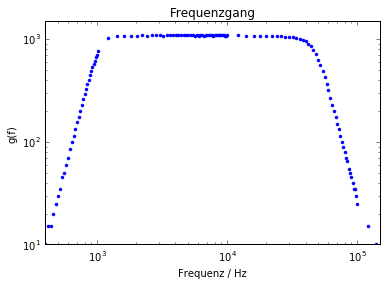

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

f, U_aus = np.loadtxt('frequenzgang.txt', skiprows=1, usecols=(0,1), unpack=True)
D=1e-3
U_ein=0.2
g=U_aus/(U_ein * D)

#g über f in ein doppellogarithmisches Diagramm eintragen:

plt.loglog(f[2:-2],g[2:-2], linestyle='None', marker='.')
plt.axis([4E2, 1.5e5, 10, 1.5E3])
plt.xlabel('Frequenz / Hz')
plt.ylabel('g(f)')
plt.title('Frequenzgang')

### A2: Funktion anpassen

Startwerte für die Fitparameter: 
- Verstärkung V: 1000
- untere Grenzfrequenz W1: 1000
- obere Grenzfrequenz W2: 50000
- Filterordnung n1, n2: 5

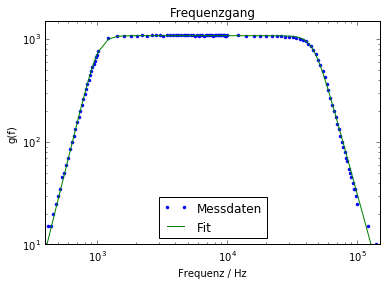

In [10]:
from scipy.optimize import curve_fit

def fit_func(f, V, W1, W2, n1, n2):
    return V/(np.sqrt(1+1/(f/W1)**(2*n1))*np.sqrt(1+(f/W2)**(2*n2)))

p0 = [1000, 1000, 50000, 5, 5]
popt, pcov = curve_fit(fit_func, f[2:-2], g[2:-2], p0)
plt.loglog(f[2:-2],g[2:-2], linestyle='None', marker='.', label='Messdaten')
plt.loglog(f, fit_func(f, *popt), label='Fit')
plt.axis([4E2, 1.5e5, 10, 1.5E3])
plt.xlabel('Frequenz / Hz')
plt.ylabel('g(f)')
plt.title('Frequenzgang')
plt.legend(loc='best')

### A3: Numerische Integration

In [11]:
import scipy.integrate as integrate

def fit_func_square(f, V, W1, W2, n1, n2):
    return fit_func(f, V, W1, W2, n1, n2)**2

B=integrate.quad(fit_func_square, f[2], f[-2], args=tuple(popt))
print('Das Integral begtraegt: {value:.4e}'.format(value=B[0]))

Das Integral begtraegt: 5.4581e+10


### A4: Bestimmung der Boltzmannkonstante

diesen Abschnitt noch bearbeiten, hier stecken Fehler drin, U_V und Fehlerformel 

In [12]:
R=np.array([5e3, 10e3, 15e3, 20e3, 25e3, 30e3]) #Widerstände
U_aus=np.array([2.4093, 3.1198, 3.6971, 4.2011, 4.6534, 5.0728 ]) #Rauschspannung (Mittelwerte in mV)
fehler_U_aus=np.array([0.00825, 0.0111, 0.0133, 0.0166, 0.0162, 0.0187]) #Standardabweichung in mV
U_V=1,3803 #Rauschspannung bei 0 Ohm ???
D=U_aus**2-U_V**2
fehler_D=np.sqrt((0.003*U_aus)**2+(0.003*U_V)**2)
    
plt.errorbar(R, D, yerr=fehler_D, fmt='.')
plt.axis([0, 3.2e4, 0, 25])

TypeError: unsupported operand type(s) for ** or pow(): 'tuple' and 'int'

In [13]:
#Fitten einer Gerade an die Daten: 
def linear(x, c): 
    return c*x

chisquare=np.sum(((linear(R, *popt)-D)**2/fehler_D**2))
dof=5 #degrees of freedom, Freiheitsgrade
chisquare_red=chisquare/dof
print(chisquare)
print(chisquare_red)

#Fitwahrscheinlichkeit berechnen: 
from scipy.stats import chi2
prob=round(1-chi2.cdf(chisquare, dof), 2)*100
print('Wahrscheinlichkeit = 'str(prob)+'%')

SyntaxError: invalid syntax (<ipython-input-13-c10f1f44960b>, line 14)